<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/ANOVAvsMLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

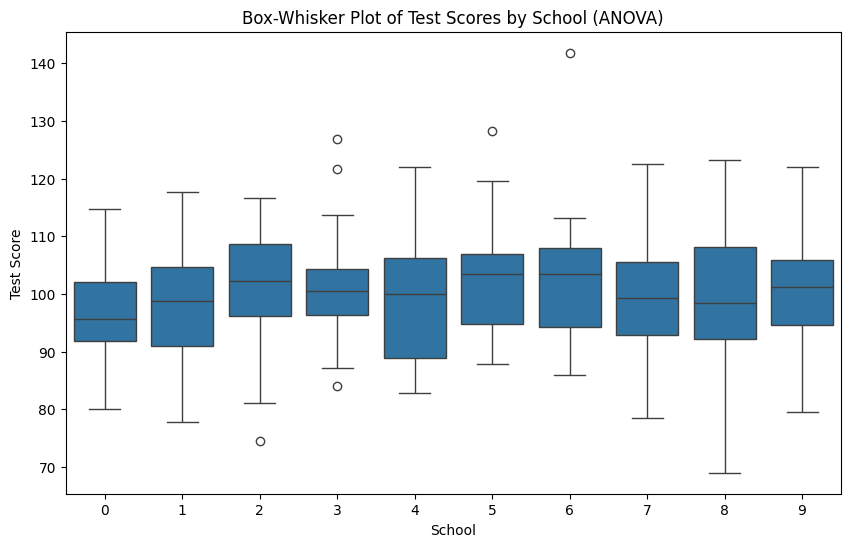

ANOVA Results:
                  sum_sq     df         F    PR(>F)
C(school)   1335.959914    9.0  1.489562  0.151084
Residual   28899.496522  290.0       NaN       NaN
Mixed Linear Model Summary:
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score    
No. Observations: 300     Method:             REML     
No. Groups:       10      Scale:              0.9521   
Min. group size:  30      Log-Likelihood:     -440.5477
Max. group size:  30      Converged:          Yes      
Mean group size:  30.0                                 
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   50.031    0.533  93.929 0.000 48.987 51.075
study_hours  5.017    0.029 173.428 0.000  4.960  5.074
Group Var    1.970    0.982                            



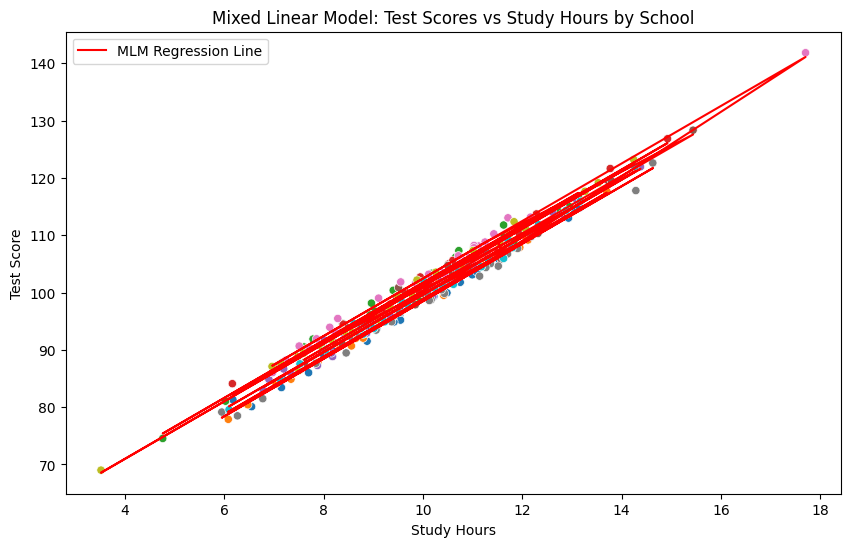

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Simulate Data
np.random.seed(42)

# Parameters
n_schools = 10
students_per_school = 30
n_students = n_schools * students_per_school

# Generate data
schools = np.repeat(np.arange(n_schools), students_per_school)
study_hours = np.random.normal(10, 2, n_students)
school_effect = np.random.normal(0, 2, n_schools)
individual_effect = np.random.normal(0, 1, n_students)
scores = 50 + 5 * study_hours + school_effect[schools] + individual_effect

# Create DataFrame
data = pd.DataFrame({
    'school': schools,
    'study_hours': study_hours,
    'score': scores
})

# Boxplot for ANOVA
plt.figure(figsize=(10, 6))
sns.boxplot(x='school', y='score', data=data)
plt.title('Box-Whisker Plot of Test Scores by School (ANOVA)')
plt.xlabel('School')
plt.ylabel('Test Score')
plt.show()

# Perform One-Way ANOVA
anova_model = smf.ols('score ~ C(school)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Results:\n", anova_table)

# Mixed Linear Model (MLM)
# Model: Test Score ~ Study Hours + (1|School) (Random Intercept Model)
mlm_model = smf.mixedlm("score ~ study_hours", data, groups=data['school']).fit()
print("Mixed Linear Model Summary:\n", mlm_model.summary())

# Scatter Plot of Study Hours vs Test Scores with MLM Regression Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours', y='score', data=data, hue='school', palette='tab10', legend=False)
plt.plot(data['study_hours'], mlm_model.fittedvalues, color='red', label='MLM Regression Line')
plt.title('Mixed Linear Model: Test Scores vs Study Hours by School')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

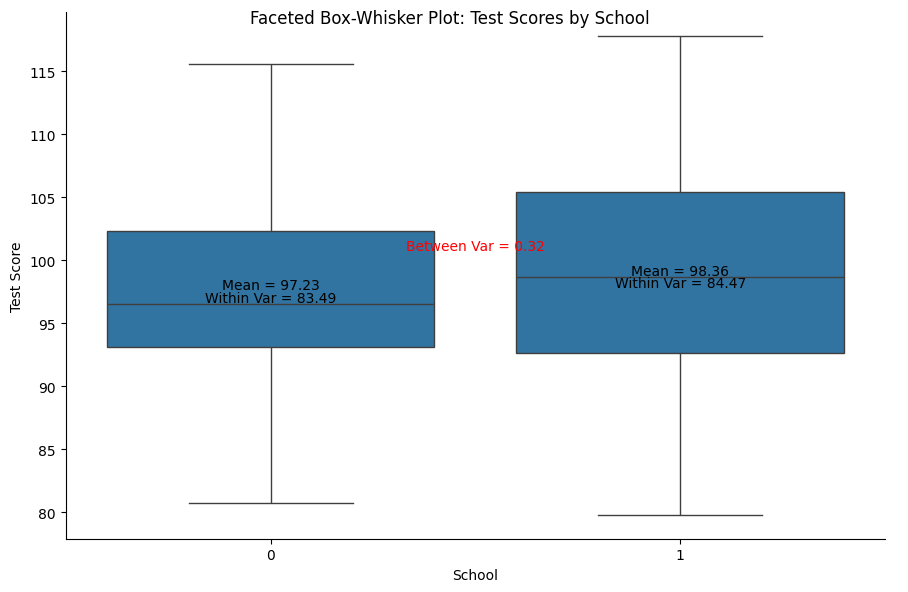

ANOVA Results:
                 sum_sq    df         F    PR(>F)
C(school)    19.037870   1.0  0.226695  0.635774
Residual   4870.838009  58.0       NaN       NaN
Mixed Linear Model Summary:
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score   
No. Observations: 60      Method:             REML    
No. Groups:       2       Scale:              0.9356  
Min. group size:  30      Log-Likelihood:     -85.6621
Max. group size:  30      Converged:          Yes     
Mean group size:  30.0                                
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept   49.555    0.710 69.752 0.000 48.163 50.948
study_hours  4.978    0.069 71.761 0.000  4.842  5.114
Group Var    0.075    0.156                           



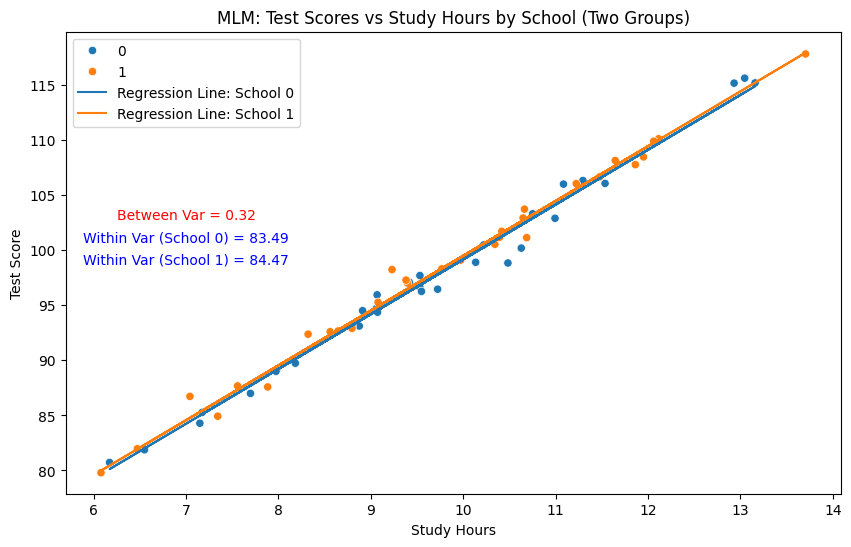

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Simulate Data for 2 Schools
np.random.seed(42)

# Parameters
n_schools = 2
students_per_school = 30
n_students = n_schools * students_per_school

# Generate data
schools = np.repeat(np.arange(n_schools), students_per_school)
study_hours = np.random.normal(10, 2, n_students)
school_effect = np.random.normal(0, 2, n_schools)
individual_effect = np.random.normal(0, 1, n_students)
scores = 50 + 5 * study_hours + school_effect[schools] + individual_effect

# Create DataFrame for 2 schools
data = pd.DataFrame({
    'school': schools,
    'study_hours': study_hours,
    'score': scores
})

# Faceted Box-Whisker Plot
plt.figure(figsize=(12, 6))
g = sns.catplot(x='school', y='score', data=data, kind='box', height=6, aspect=1.5)
g.set_axis_labels("School", "Test Score")
plt.suptitle("Faceted Box-Whisker Plot: Test Scores by School")

# Calculate and annotate group means and variance components
group_means = data.groupby('school')['score'].mean()
overall_mean = data['score'].mean()
within_variances = data.groupby('school')['score'].var()
between_variance = np.var(group_means)

# Annotating group means and variances on the plot
for i, (school, mean) in enumerate(group_means.items()):
    plt.text(i, mean + 0.5, f'Mean = {mean:.2f}', horizontalalignment='center', size='medium', color='black')
    plt.text(i, mean - 0.5, f'Within Var = {within_variances[school]:.2f}', horizontalalignment='center', size='medium', color='black')

plt.text(0.5, overall_mean + 3, f'Between Var = {between_variance:.2f}', horizontalalignment='center', size='medium', color='red')
plt.show()

# Perform One-Way ANOVA
anova_model = smf.ols('score ~ C(school)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Results:\n", anova_table)

# Mixed Linear Model (MLM) with Two Schools
mlm_model = smf.mixedlm("score ~ study_hours", data, groups=data['school']).fit()
print("Mixed Linear Model Summary:\n", mlm_model.summary())

# Scatter Plot of Study Hours vs Test Scores with MLM Regression Lines for Two Schools
plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours', y='score', data=data, hue='school', palette='tab10')

# Plot the regression line from MLM for each school
for school in range(n_schools):
    school_data = data[data['school'] == school]
    plt.plot(school_data['study_hours'], mlm_model.fittedvalues[school_data.index], label=f'Regression Line: School {school}')

# Annotate variance components on the plot
overall_mean = data['score'].mean()
plt.text(7, overall_mean + 5, f'Between Var = {between_variance:.2f}', horizontalalignment='center', size='medium', color='red')
plt.text(7, overall_mean + 3, f'Within Var (School 0) = {within_variances[0]:.2f}', horizontalalignment='center', size='medium', color='blue')
plt.text(7, overall_mean + 1, f'Within Var (School 1) = {within_variances[1]:.2f}', horizontalalignment='center', size='medium', color='blue')

plt.title('MLM: Test Scores vs Study Hours by School (Two Groups)')
plt.xlabel('Study Hours')
plt.ylabel('Test Score')
plt.legend()
plt.show()


In [3]:
!pip install plotly statsmodels pandas numpy


In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Simulate Data for 4 Schools
np.random.seed(42)

# Parameters
n_schools = 4
students_per_school = 30
n_students = n_schools * students_per_school

# Generate data
schools = np.repeat(np.arange(n_schools), students_per_school)
study_hours = np.random.normal(10, 2, n_students)
school_effect = np.random.normal(0, 2, n_schools)
individual_effect = np.random.normal(0, 1, n_students)
scores = 50 + 5 * study_hours + school_effect[schools] + individual_effect

# Create DataFrame for 4 schools
data = pd.DataFrame({
    'school': schools,
    'study_hours': study_hours,
    'score': scores
})

# ANOVA Box-Whisker Plot using Plotly
fig_anova = px.box(data, x='school', y='score', title='Box-Whisker Plot: Test Scores by School (ANOVA)',
                   facet_col='school', labels={"school": "School", "score": "Test Score"})

# Calculate and annotate group means and variance components
group_means = data.groupby('school')['score'].mean()
within_variances = data.groupby('school')['score'].var()
overall_mean = data['score'].mean()
between_variance = np.var(group_means)

# Adding annotations for means and variances
for school in range(n_schools):
    fig_anova.add_annotation(x=school, y=group_means[school] + 2,
                             text=f"Mean = {group_means[school]:.2f}<br>Within Var = {within_variances[school]:.2f}",
                             showarrow=False, font=dict(color='black'))

fig_anova.add_annotation(x=1.5, y=overall_mean + 10, text=f"Between Var = {between_variance:.2f}",
                         showarrow=False, font=dict(color='red'))

fig_anova.show()

# Perform One-Way ANOVA
anova_model = smf.ols('score ~ C(school)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Results:\n", anova_table)

# Mixed Linear Model (MLM) with 4 Schools
mlm_model = smf.mixedlm("score ~ study_hours", data, groups=data['school']).fit()
print("Mixed Linear Model Summary:\n", mlm_model.summary())

# Scatter Plot of Study Hours vs Test Scores with MLM Regression Lines for 4 Schools using Plotly
fig_mlm = px.scatter(data, x='study_hours', y='score', color='school', title='MLM: Test Scores vs Study Hours by School',
                     facet_col='school', labels={"study_hours": "Study Hours", "score": "Test Score"})

# Adding MLM regression lines and annotations
for school in range(n_schools):
    school_data = data[data['school'] == school]
    fig_mlm


ANOVA Results:
                  sum_sq     df         F    PR(>F)
C(school)    740.607643    3.0  2.852039  0.040374
Residual   10040.826796  116.0       NaN       NaN
Mixed Linear Model Summary:
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score    
No. Observations: 120     Method:             REML     
No. Groups:       4       Scale:              0.9970   
Min. group size:  30      Log-Likelihood:     -180.7406
Max. group size:  30      Converged:          Yes      
Mean group size:  30.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    50.475    1.436 35.154 0.000 47.661 53.289
study_hours   4.954    0.050 99.780 0.000  4.857  5.051
Group Var     7.258    6.035                           



In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Simulate Data for 4 Schools
np.random.seed(42)

# Parameters
n_schools = 4
students_per_school = 30
n_students = n_schools * students_per_school

# Generate data
schools = np.repeat(np.arange(n_schools), students_per_school)
study_hours = np.random.normal(10, 2, n_students)
school_effect = np.random.normal(0, 2, n_schools)
individual_effect = np.random.normal(0, 1, n_students)
scores = 50 + 5 * study_hours + school_effect[schools] + individual_effect

# Create DataFrame for 4 schools
data = pd.DataFrame({
    'school': schools,
    'study_hours': study_hours,
    'score': scores
})

# Perform One-Way ANOVA
anova_model = smf.ols('score ~ C(school)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA Results:\n", anova_table)

# Mixed Linear Model (MLM) with 4 Schools
mlm_model = smf.mixedlm("score ~ study_hours", data, groups=data['school']).fit()
print("Mixed Linear Model Summary:\n", mlm_model.summary())

# Create Subplots for Box-Whisker and Scatter Plot

# Set up the subplot grid (2 rows: one for box-plot, one for scatter plot)
fig = make_subplots(rows=2, cols=5,
                    subplot_titles=["School 0", "School 1", "School 2", "School 3", "Total Distribution"],
                    row_heights=[0.5, 0.5],  # 50% height for each row
                    vertical_spacing=0.1)    # Space between box-plot and scatter plot

# Box-Whisker Plot for each school
for school in range(n_schools):
    # Individual school box plots
    fig.add_trace(go.Box(y=data[data['school'] == school]['score'], name=f"School {school}",
                         boxmean=True, marker_color='blue'), row=1, col=school+1)

# Add a box-plot for the total distribution (across all schools)
fig.add_trace(go.Box(y=data['score'], name="Total", boxmean=True, marker_color='green'), row=1, col=5)

# Scatter plot for each school (in the second row)
for school in range(n_schools):
    school_data = data[data['school'] == school]
    # Add scatter plot of study hours vs score for each school
    fig.add_trace(go.Scatter(x=school_data['study_hours'], y=school_data['score'],
                             mode='markers', name=f"School {school}"),
                  row=2, col=school+1)

    # Add the regression line from the MLM model for each school
    fig.add_trace(go.Scatter(x=school_data['study_hours'],
                             y=mlm_model.fittedvalues[school_data.index],
                             mode='lines', line=dict(color='red'), showlegend=False),
                  row=2, col=school+1)

# Scatter plot for total data (all schools combined) in the last subplot
fig.add_trace(go.Scatter(x=data['study_hours'], y=data['score'],
                         mode='markers', name="Total", marker_color='green'),
              row=2, col=5)

# Add the overall regression line from the MLM for the total data
fig.add_trace(go.Scatter(x=data['study_hours'], y=mlm_model.fittedvalues,
                         mode='lines', line=dict(color='red'), showlegend=False),
              row=2, col=5)

# Update layout
fig


ANOVA Results:
                  sum_sq     df         F    PR(>F)
C(school)    740.607643    3.0  2.852039  0.040374
Residual   10040.826796  116.0       NaN       NaN
Mixed Linear Model Summary:
          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score    
No. Observations: 120     Method:             REML     
No. Groups:       4       Scale:              0.9970   
Min. group size:  30      Log-Likelihood:     -180.7406
Max. group size:  30      Converged:          Yes      
Mean group size:  30.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    50.475    1.436 35.154 0.000 47.661 53.289
study_hours   4.954    0.050 99.780 0.000  4.857  5.051
Group Var     7.258    6.035                           

